# LOADED BEAM

### INTRODUCTION TO THE PROBLEM

Today's case represents a beam attached to the wall at one side, free to move on the other. It was asked us to find the analytical model and the representation of a particulary case: the inflection and deformation when subjected with a distributed load. As our riferiment system we decided to set the point at the wall as the origin and the other end as 1, considering a general case of  a board of unitary length.
For the ordinary axis, we oriented it to the groud and vertically-oriented
 To semplify che discussion, we will consider a one-dimensional bar as the representation of an entire board, considering just its projection  to the xy plane. As consequence, every misure is function of the x, indeed the distance from the wall.
 
As initial condition we consider

1- the displacement equals 0 at the wall (u(x=0)=0)

2- the derivative of the displacement equals 0 at the wall(du(x=0)/dx=0)

### PRELIMINARY CONSIDERATION

First of all, we decided to find the link between 2nd derivative of displacement and position. This lead us to the known formula $$ \frac{d^2u}{ dx^2} = - \frac{M(x)}{EJ} $$, where E is the Joung Modulus, J is the moment of inertia of the section and M is the momentum. 

## 1. REFERENCE CASE

The first case we analized was the one where M(x) is constant and particularly M/EJ equals -1. This case represents a simplified view of the problem, allowing us to simplify the subsequent equation. 
However, this model is not the most accurate representation of reality. 

We start with a double integration, resulting in the following formula 

   $$ u(x) = -1/2 x^2 + C1 x + C2. $$

In order to find the two constants we apply the following boundary conditions: 

$$ u(x=0) = 0  $$ 
and 
$$ u'(x=0) = 0. $$

The result is 

$$ u(x) = -1/2 x^2.  $$

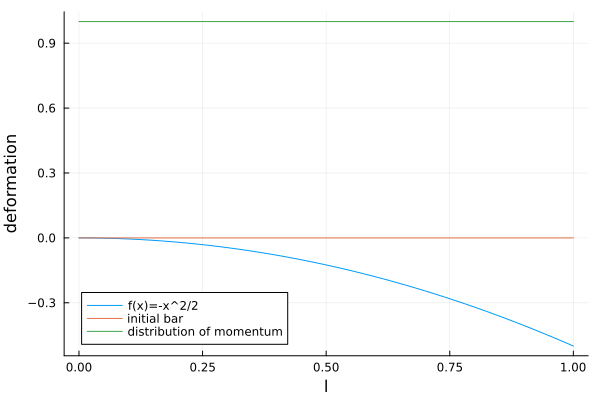

In [56]:
using Plots

l=1
M(x)=1
function f(x)
    -x^2/2
end

x_values=range(0,l,50)

y_values=f.(x_values)

m_values=M.(x_values)

plot(x_values,y_values,label="f(x)=-x^2/2",xlabel="l",ylabel="deformation")
plot!(x_values,0*x_values,label="initial bar")
plot!(x_values, m_values, label="distribution of momentum")



### 1.1 LINEAR DISTRIBUTION OF MOMENTUM

The second case we considerd was  M(x)=F(l-x), so it's a linear distribution along the board. 

After a double integration, we led to the  formula 

$$ u(x) = -1/6 x^3 + C1*1/2 x^2 + C2x $$


In order to find the two constants we apply the following boundary conditions:

$$ u(x=0) = 0 $$ 
and 
$$ u'(x=0) = 0. $$

The result is

$$ u(x) = 1/2 x^2-1/6 x^3. $$

In [57]:
using Plots

l=1

F(x)= 1+0*x
M(x)= F(x).*(l-x)


f(x) = -x^2/2+x^3/6

x_values= range(0,l,50)

y_values=f.(x_values)

m_values=M.(x_values)


plot(x_values,0*x_values,label="initial bar")
plot!(x_values,y_values,label="f(x)=-x^2/2+x^3/6",xlabel="l",ylabel="deformation")
plot!(x_values, m_values, label="distribution of momentum")



ErrorException: cannot define function F; it already has a value

### 1.3 GENERAL DISTRIBUTION OF MOMENTUM

We can also use numerical integration to solve a generical distrubution of momentum, using the second derivative law 

In [58]:
using DifferentialEquations
using Plots 
l=1
F=1
E(x)=1
J(x)=1

function M(x)
    -F/(E.(x)*J.(x)).*(l-x) #momentum
end 

function beam!(du,u,p,x)   
    du[1]= u[2]
    du[2]= M(x)
end 

function bc!(residual,u,p,t)
    residual[1]=u[1]u[1]
    residual[2]=u[2]u[1]
end

xspan=(0,1)
bvp = BVProblem(beam!,bc!,[0,0],xspan)
u_sol = solve(bvp,BS3(),saveat=0.01)

m_values=M.(xspan)

plot(xspan,0*xspan,label="initial bar")
plot!(u_sol[1,:],label="deflaction")
#plot!(xspan,m_values,label="momentum")



MethodError: MethodError: no method matching *(::Int64, ::Tuple{Int64, Int64})

Closest candidates are:
  *(::Any, ::Any, !Matched::Any, !Matched::Any...)
   @ Base operators.jl:578
  *(::T, !Matched::T) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8}
   @ Base int.jl:88
  *(::Union{Real, Complex}, !Matched::Union{LinearAlgebra.Adjoint{var"#s972", var"#s9721"}, LinearAlgebra.Transpose{var"#s972", var"#s9721"}} where {var"#s972"<:Union{Real, Complex}, var"#s9721"<:(AbstractVector)}, !Matched::AbstractMatrix{<:Union{Real, Complex}}, !Matched::AbstractMatrix{<:Union{Real, Complex}})
   @ LinearAlgebra C:\Users\marco\AppData\Local\Programs\Julia-1.9.3\share\julia\stdlib\v1.9\LinearAlgebra\src\matmul.jl:1218
  ...


## 2. BI-HARMONIC FORMULATION

The bi-harmonic equation consit in the following formulation:

   $$ \frac{d^4u}{dx^4}= \frac{q(x)}{EJ} $$

 
where q(x) is the distribution of loads along the bar. To make it easier, we are going to substitute q(x)/EJ=g(x) ad consider g(x)=constant=1 (this means q=EJ).

Initial condition, since we need four of them:

$$ u(0)=0 $$

$$ \frac{du(0)}{dx}=0 $$

$$ \frac{d^2u(l)}{dx^2}=0 $$
    
$$ \frac{d^3u(l)}{dx^3}=0 $$

After four integration, we reach the formula:

$$ u(x)=(-1/24(l-x)^4-1/6l^3*x+1/24*l^4) $$




### 2.1 GENERAL DISTRIBUTION OF LOAD ON THE BAR

Once we define the solution for the easiest case, we moved to the most general one: a general distribution of loads along the length of the bar, using functions from the DifferentialEquation pakage to solve all the four integrations in order to reach u(x)

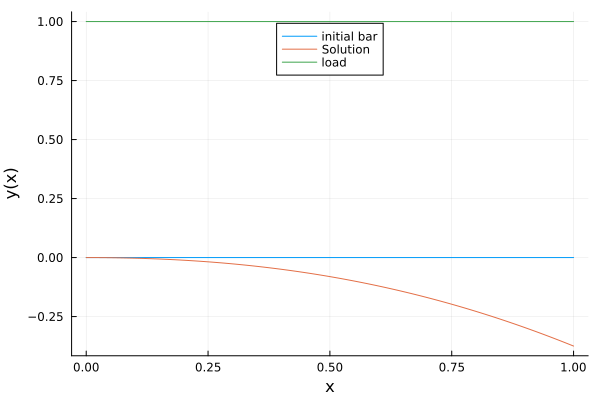

In [3]:
using DifferentialEquations
using Plots

# Define the differential equation for y''''(x) = x
function ode!(du, u, p, x)
    du[1] = u[2]
    du[2] = u[3]
    du[3] = u[4]
    du[4] = p[1](x)  # Extract the function f(x) from the parameters
end

# Define the load function f(x)
f(x) = 1


# Set up the ODE problem for y''''(x) = f(x)
a = 0.0  # Lower bound
b = 1.0  # Upper bound
u₀ = [0.0, 0.0, -0.5, -1]  # Initial values for y, y', y'', y'''
ode_prob = ODEProblem(ode!, u₀, (a, b), [f])

# Solve the ODE problem using Tsit5 solver
sol = solve(ode_prob, Tsit5())

# Extract the solution values for y(x)
x_values = range(a, b, length=100)
y_values = hcat(sol(x_values)...)  # Extract values for y, y', y'', y'''
f_values=f.(x_values)
# Plot the solution
plot(x_values,0*x_values,label="initial bar")
plot!(x_values, y_values[1, :], label="Solution", xlabel="x", ylabel="y(x)", legend=:top)
plot!(x_values,f_values,label="load")